In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import pickle
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import numpy as np
import cvxpy as cp

/home/tbellagio/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
delta_p_normed_file = 'delta_p_normed.csv'
delta_p_normed = dd.read_csv(delta_p_normed_file, sep = ',')

In [3]:
delta_p_normed = delta_p_normed.compute() 

In [4]:
delta_p_normed = delta_p_normed.reset_index(drop=True)

In [ ]:
genotype_counts = pd.read_csv('../leave_1_out/genotype_counts_fullgenome231ecotypes.csv').drop('Unnamed: 0', axis=1)


In [7]:
path_ecotypes = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_ecotype_frequency.txt'
real_ef = pd.read_csv(path_ecotypes, sep = '\t')

with open('splits_samples.pkl', 'rb') as file:
    splits_samples = pickle.load(file)

In [34]:
split_number = 20

In [35]:
predicted_delta_p_normed_bio1_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/predicted_allele_freq_bio1.csv'
snps_indices_bio1_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/snps_indices_bio1.csv'
output_file_af = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/r2_pred_allele_freq.csv' 
output_file_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/r2_pred_ecotype_freq.csv' 
output_file_sp = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/spcorr_pred_ecotype_freq.csv' 

In [36]:
env_train_file =  f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/environment_lea_full_genome.csv'
env_test_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/environment_test.csv'

In [37]:
env_train = pd.read_csv(env_train_file)
env_test = pd.read_csv(env_test_file)

In [38]:
train_samples = splits_samples[split_number][0]
test_samples = splits_samples[split_number][1]

In [39]:
len(train_samples)

186

In [40]:
len(test_samples)

48

In [41]:
delta_p_normed_train = delta_p_normed[train_samples]
delta_p_normed_train_mean = delta_p_normed_train.mean(axis=1)

In [42]:
delta_p_normed_test = delta_p_normed[test_samples]
delta_p_normed_test_mean = delta_p_normed_test.mean(axis=1)

In [43]:
delta_p_normed_train_mean.corr(delta_p_normed_test_mean)

0.6788409627619001

<Axes: >

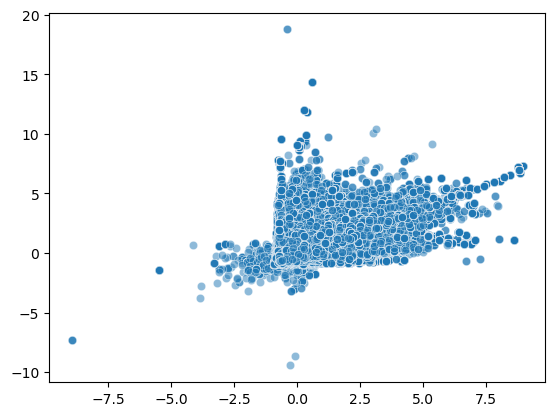

In [23]:
#sns.scatterplot(x = delta_p_normed_train_mean, y= delta_p_normed_test_mean, alpha =0.5)

In [ ]:
## compare to the founder 


In [44]:
snps_indices_bio1 = pd.read_csv(snps_indices_bio1_file)
snps_0index = snps_indices_bio1['x'] - 1 
snps_0index = snps_0index.to_list()

In [45]:
delta_p_normed_test_sel = delta_p_normed_test.iloc[snps_0index,:]

In [46]:
delta_p_normed_train_sel = delta_p_normed_train.iloc[snps_0index,:]

In [47]:
delta_p_normed_train_sel.columns = env_train['bio1']

In [48]:
delta_p_normed_test_sel.columns = env_test['bio1']

In [51]:
delta_p_normed_train_sel

bio1,0.858158,0.858158,0.858158,0.858158,0.858158,0.858158,0.858158,0.858158,0.858158,0.858158,...,-0.597908,-0.597908,-0.597908,-0.597908,-0.597908,-0.597908,-0.597908,-0.597908,-0.597908,-0.597908
47448,-0.310588,0.092537,-0.060999,1.807219,1.790319,1.112011,1.414246,1.935819,0.970970,2.383575,...,-0.399791,1.398530,1.021460,-1.361465,3.647347,2.638500,2.145419,-1.335328,1.245335,1.267679
78630,-0.359776,0.144383,-0.584358,1.414955,1.210941,0.602629,0.665382,1.080411,1.142410,2.007395,...,-0.250162,-0.623477,0.489277,-1.414525,0.455126,-0.805013,2.029037,-0.184494,1.793434,1.080085
79116,-0.396183,0.058071,-0.210299,1.720087,1.877651,0.880977,1.038261,1.853409,0.894135,2.302275,...,-0.158359,-0.813827,0.475581,-1.375310,0.586784,-0.739067,2.301680,-0.090710,1.465724,1.198519
79117,-0.396183,0.058071,-0.210299,1.720087,1.877651,0.880977,1.038261,1.853409,0.894135,2.302275,...,-0.158359,-0.813827,0.475581,-1.375310,0.586784,-0.739067,2.301680,-0.090710,1.465724,1.198519
79124,-0.396183,0.058071,-0.210299,1.720087,1.877651,0.880977,1.038261,1.853409,0.894135,2.302275,...,-0.158359,-0.813827,0.475581,-1.375310,0.586784,-0.739067,2.301680,-0.090710,1.465724,1.198519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213422,-0.089672,-0.834222,-0.198312,-0.873623,-0.935269,-1.195047,-1.196528,-0.959109,-0.579205,-1.260127,...,-0.290393,-0.443201,-0.166335,2.562968,-1.610621,-0.364400,0.041845,-0.926402,-0.782178,0.170000
3213423,-0.089672,-0.834222,-0.198312,-0.873623,-0.935269,-1.195047,-1.196528,-0.959109,-0.579205,-1.260127,...,-0.290393,-0.443201,-0.166335,2.562968,-1.610621,-0.364400,0.041845,-0.926402,-0.782178,0.170000
3213424,-0.089672,-0.834222,-0.198312,-0.873623,-0.935269,-1.195047,-1.196528,-0.959109,-0.579205,-1.260127,...,-0.290393,-0.443201,-0.166335,2.562968,-1.610621,-0.364400,0.041845,-0.926402,-0.782178,0.170000
3213426,-0.089672,-0.834222,-0.198312,-0.873623,-0.935269,-1.195047,-1.196528,-0.959109,-0.579205,-1.260127,...,-0.290393,-0.443201,-0.166335,2.562968,-1.610621,-0.364400,0.041845,-0.926402,-0.782178,0.170000


In [56]:
model.

AttributeError: 'OLSResults' object has no attribute 'coef'

In [61]:
delta_p_normed_train_seldd = delta_p_normed_train_sel.drop_duplicates()

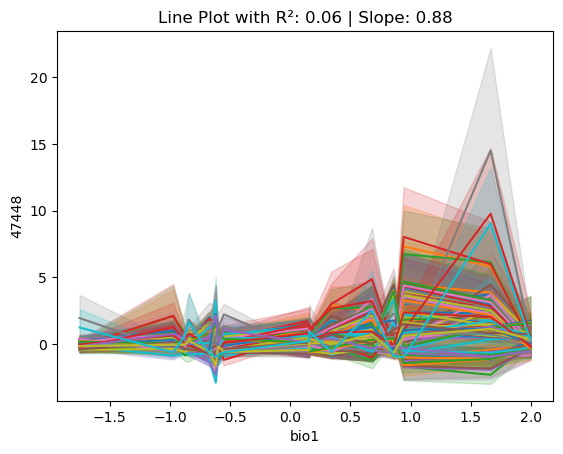

R-squared values: {47448: 0.034687190392622025, 78630: 0.10490900972436046, 79116: 0.05805015070461539, 79135: 0.047090567614291645, 80898: 0.091557335394297, 83933: 0.11508623781757121, 83934: 0.11230327542057694, 83943: 0.10379841528553502, 83944: 0.10394911515318095, 83946: 0.11090612794317445, 83953: 0.10293631873603282, 83954: 0.10419971768303771, 83956: 0.10431402754360208, 83959: 0.09983692871922689, 83960: 0.0986514048506858, 83962: 0.10577979614576294, 83965: 0.09853501148091293, 83967: 0.10148787141453985, 83970: 0.09865378637744204, 83973: 0.09972503662915533, 83976: 0.1015907833042905, 83977: 0.10039384022337083, 83978: 0.10147725311611233, 83989: 0.10063265660201293, 83993: 0.12203988088493267, 184537: 0.20449275625528396, 184541: 0.24415597138507517, 188761: 0.1385848430726132, 188809: 0.07348633568915652, 188810: 0.1752307207971605, 193555: 0.16448313489397404, 504335: 0.13570131763007032, 565593: 0.1241214036802416, 620641: 0.09487681476397125, 689369: 0.173168261554964

In [64]:
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming delta_p_normed_train_sel is a pre-defined DataFrame

# Collect R-squared values and slopes in dictionaries
r_squared_results = {}
slope_results = {}

for i in delta_p_normed_train_seldd.index:
    df = delta_p_normed_train_seldd.loc[i]
    test = df.T.sort_index()
    test = test.reset_index()
    
    # Fit linear regression model
    X = sm.add_constant(test['bio1'])  # Adds a constant term to the predictor
    y = test[i]
    model = sm.OLS(y, X).fit()
    
    # Store R-squared value and slope
    r_squared_results[i] = model.rsquared
    slope_results[i] = model.params['bio1']  # Slope for 'bio1'
    
    # Plotting
    sns.lineplot(data=test, x='bio1', y=i)
    plt.title(f'Line Plot with R²: {model.rsquared:.2f} | Slope: {model.params["bio1"]:.2f}')
plt.show()

# If you want to see all R-squared values and slopes
print("R-squared values:", r_squared_results)
print("Slopes:", slope_results)



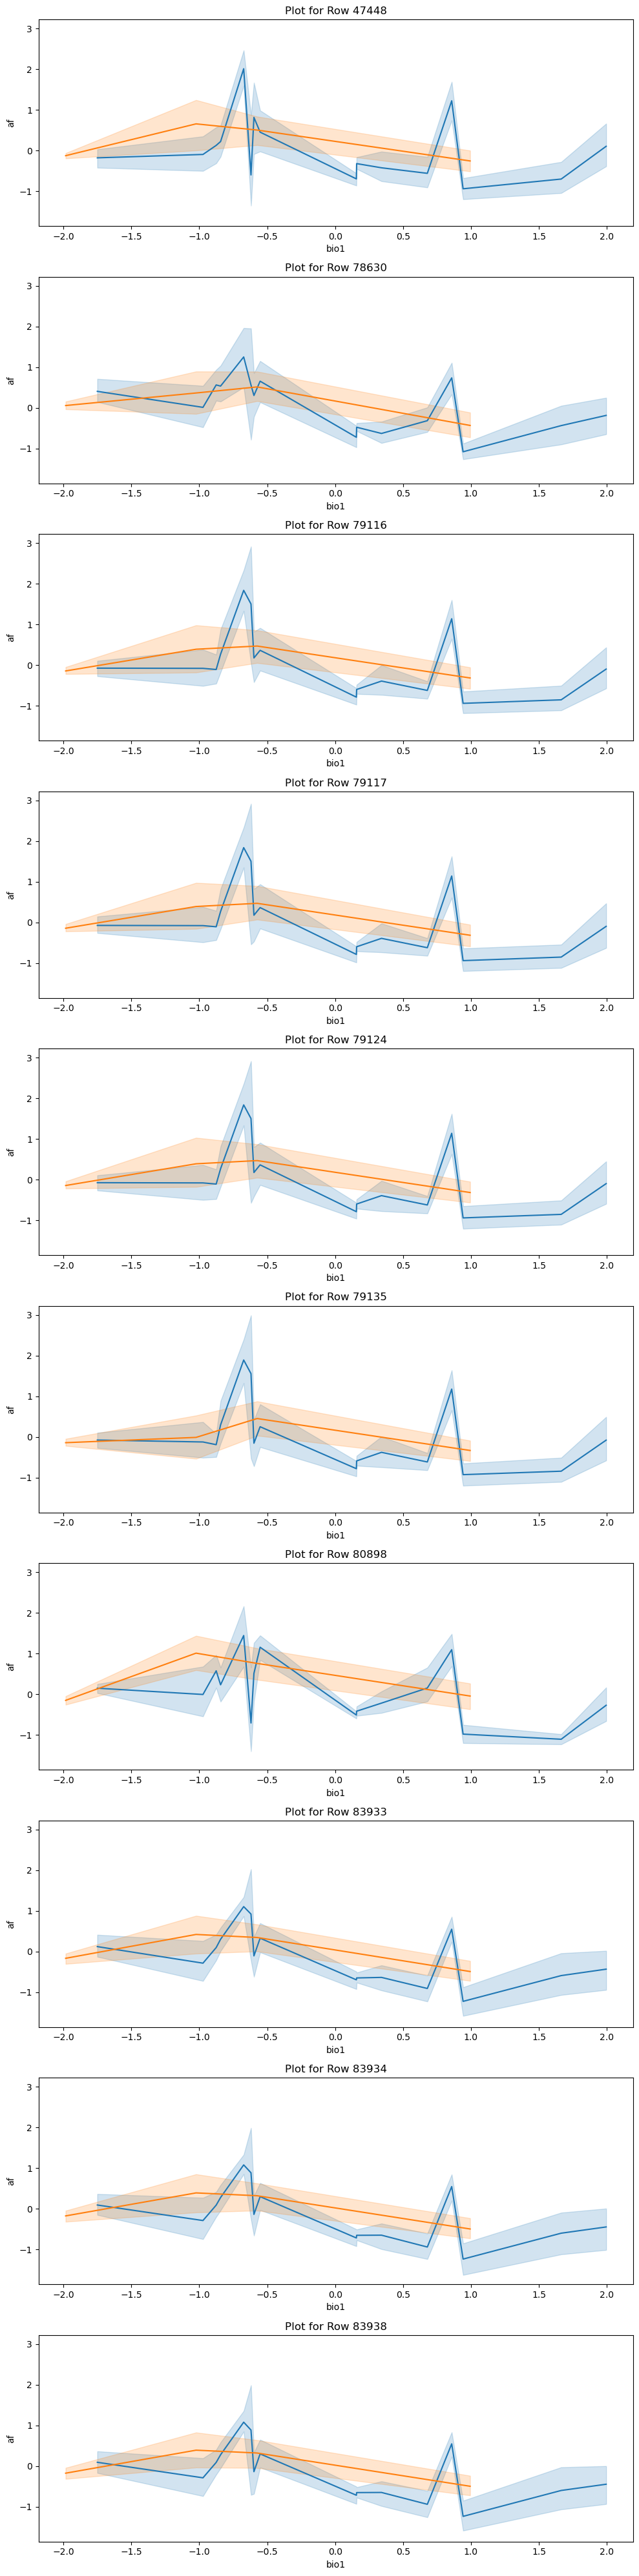

In [50]:
# Assuming allele_freq_sel_train is your DataFrame
# Creating a figure with multiple subplots. Here we create 10 subplots vertically.
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 40), sharey=True)

# Iterate over the first 10 rows, each row gets its own subplot
for idx, (ax, row_index) in enumerate(zip(axes, delta_p_normed_train_sel.index[:20])):
    # Extract the row as a DataFrame
    df_train = delta_p_normed_train_sel.loc[[row_index]].T
    df_train = df_train.reset_index()
    df_train.columns = ['bio1', 'af']

    df_test = delta_p_normed_test_sel.loc[[row_index]].T
    df_test = df_test.reset_index()
    df_test.columns = ['bio1', 'af']

    # Plotting the line plot on the corresponding subplot axis
    sns.lineplot(data=df_train, x='bio1', y='af', ax=ax)
    sns.lineplot(data=df_test, x='bio1', y='af', ax=ax)

    
    ax.set_title(f'Plot for Row {row_index}')
    ax.set_xlabel('bio1')
    ax.set_ylabel('af')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Assuming allele_freq_sel_train is your DataFrame
# Creating a figure with multiple subplots. Here we create 10 subplots vertically.
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 40), sharey=True)

# Iterate over the first 10 rows, each row gets its own subplot
for idx, (ax, row_index) in enumerate(zip(axes, delta_p_normed_train_sel.index[:10])):
    # Extract the row as a DataFrame
    df_train = delta_p_normed_train_sel.loc[[row_index]].T
    df_train = df_train.reset_index()
    df_train.columns = ['bio1', 'af']

    df_test = delta_p_normed_test_sel.loc[[row_index]].T
    df_test = df_test.reset_index()
    df_test.columns = ['bio1', 'af']

    # Plotting the line plot on the corresponding subplot axis
    sns.scatterplot(data=df_train, x='bio1', y='af', ax=ax)
    sns.scatterplot(data=df_test, x='bio1', y='af', ax=ax)

    
    ax.set_title(f'Plot for Row {row_index}')
    ax.set_xlabel('bio1')
    ax.set_ylabel('af')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='bio1', ylabel='7740'>

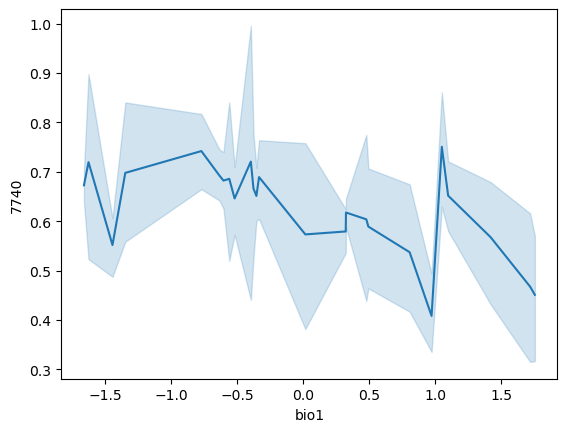

In [81]:
df = allele_freq_sel_train.loc[7740]
test = df.T.sort_index()
test = test.reset_index()
sns.lineplot(test, x = 'bio1', y = 7740)

In [ ]:
df = allele_freq_sel_train.sample(1)



In [61]:
df.iterrows()

<generator object DataFrame.iterrows at 0x7f0ec5b449e0>

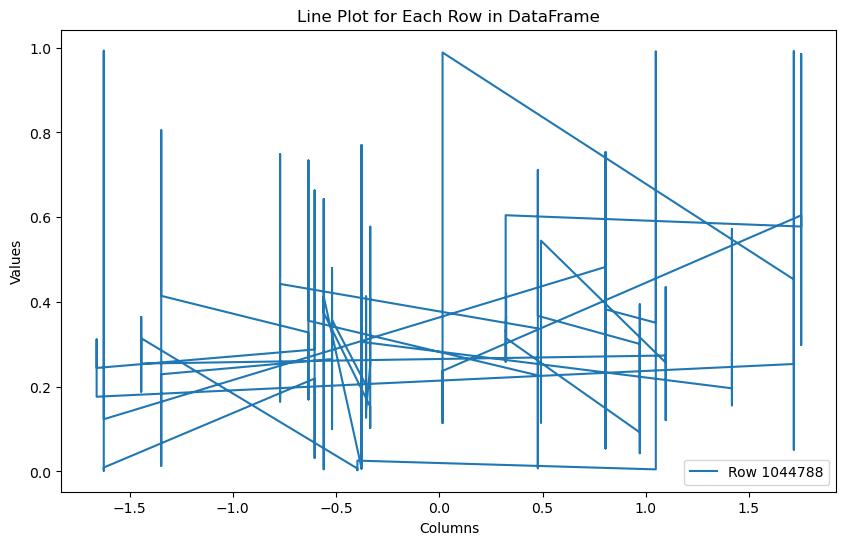

In [62]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Get column names for the x-axis
x = df.columns

# Plot each row
for index, row in df.iterrows():
    ax.plot(x, row, label=f'Row {index}')

# Adding labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Line Plot for Each Row in DataFrame')
ax.legend()

# Show the plot
plt.show()